## 95-865 Fall 2020 Quiz 2

**Your name:** 

**Your Andrew ID:** 

### Q1. Conceptual Questions (No coding)

A video streaming company Hooloo wants to understand which users are likely to subscribe
to its monthly subscription service. They hire you to analyze their data. Hooloo specifically is
interested in understanding how users' preferences in different genres are associated with
whether they end up subscribing after an initial trial period (in which users watch whatever they
want on the streaming service for free for up to 7 days).

To tackle this problem, you decide to use topic modeling combined with classification. The idea
is that users can be represented as being partly interested in different genres (which are the
topics). For the purposes of this problem, assume that an LDA topic model has already been
learned for 5 topics and that the topics are interpretable: it turns out that:

topic 0 corresponds to"action", 
topic 1 to "comedy", 
topic 2 to "drama", 
topic 3 to "romance", 
and topic 4 to "science fiction".

For example, a user with 20% interest in "action", 5% interest in "comedy", 35% interest in
"romance", and 40% interest in "science fiction" could be represented as the "LDA-transformed"
feature vector [0.2, 0.05, 0.0, 0.35, 0.4] .

For an arbitrary user, we denote the user's LDA-transformed feature vector representation by
the variable z , which is a 1D numpy array of numbers of length 5 (since there are 5 topics). To
make a prediction for whether the user corresponding to z will subscribe to the Hooloo
subscription service, we further assume that we feed z as input to a logistic regression
predictor, i.e., a linear layer with 2 nodes and softmax activation. Suppose that this already-
trained linear layer has the 5-by-2 weight matrix given by

$$
\begin{bmatrix}
1/2 & 0 \\
0 & 1/2 \\
0 & 1/2 \\
1/2 & 0 \\
0 & 0
\end{bmatrix},
$$

and bias vector [-1/2, 1/2]. Note that here, output node 0 corresponds to "will subscribe" and
output node 1 corresponds to "will not subscribe". Also, for the weight matrix, the rows
correspond to topics 0, 1, 2, 3, and 4. The weight matrix and bias vector at this point are treated
as fixed---we are not updating the values in them.

**(a) [5 points]** Hooloo wants to ensure that among users predicted to be likely to subscribe, that
as many of these users are actually going to subscribe. Which metric do they care about?

- True positive rate
- False positive rate
- Precision
- F1 score

**Your answer here (for this part, we are explicitly not asking you to explain your answer and will only be giving full credit for a correct answer or 0 for an incorrect answer):** REPLACE THIS TEXT WITH YOUR ANSWER

**(b) [5 points]** True or false: if we add up the values in z , we get 1.

- True
- False

**Your answer here (for this part, we are explicitly not asking you to explain your answer and will only be giving full credit for a correct answer or 0 for an incorrect answer):** REPLACE THIS TEXT WITH YOUR ANSWER

**(c) [5 points]** According to the already trained logistic regression model, which two genres
being present are associated with a user being more likely to subscribe?

- action
- comedy
- drama
- romance
- science fiction

**Your answer here (for this part, we are explicitly not asking you to explain your answer and will only be giving full credit for a correct answer or 0 for an incorrect answer):** REPLACE THIS TEXT WITH YOUR ANSWER

**(d) [5 points]** Does the "science ﬁction" topic aﬀect the prediction of the already trained logistic
regression model?
- Yes
- No

**Your answer here:** REPLACE THIS TEXT WITH YOUR ANSWER

**Briefly justify your answer (for this part, a correct answer without an explanation will not receive full credit):** REPLACE THIS TEXT WITH YOUR ANSWER


**(e) [5 points]** By feeding `z` into the already trained logistic regression model, what is the output
before the softmax activation? Note that this output has 2 values (1 per node). For each value,
please write the value in terms of the variable `z` . For example, if you think output node 0 has a
value given by the 0-th entry of `z` added to the log of the 4-th entry of `z` , then you would write
`z[0] + log(z[4])`.

**Output node 0 ("will subscribe") value before softmax (just the ﬁnal answer; we ask for an
explanation later):** REPLACE THIS TEXT WITH YOUR ANSWER

**Output node 1 ("will subscribe") value before softmax (just the ﬁnal answer; we ask for an
explanation later):** REPLACE THIS TEXT WITH YOUR ANSWER

**Brieﬂy explain how you got your answers above (correct answers above without correct explanations will not receive full credit):**
    
- Output node 0: REPLACE THIS TEXT WITH YOUR ANSWER

- Output node 1: REPLACE THIS TEXT WITH YOUR ANSWER

**(f) [5 points]** Continuing oﬀ the previous subpart, by feeding `z` into the already trained logistic
regression model, what is the ﬁnal output, i.e., the output after the softmax activation? Just as
with **part (e)**, please express your answer in terms of the variable `z` .

**Output node 0 ("will subscribe") value after softmax (just the ﬁnal answer; we ask for an
explanation later):** REPLACE THIS TEXT WITH YOUR ANSWER

**Output node 1 ("will subscribe") value after softmax (just the ﬁnal answer; we ask for an
explanation later):** REPLACE THIS TEXT WITH YOUR ANSWER

**Brieﬂy explain how you got your answers above (correct answers above without correct explanations will not receive full credit):** REPLACE THIS TEXT WITH YOUR ANSWER

**(g) [5 points]** True or false: when making a prediction, we do not actually need to compute the
softmax activation; we can already ﬁgure out which class has higher probability by only using
the linear layer output before the softmax activation. In other words, to ﬁgure out which class
has higher probability, we do not actually need to do the calculation in part (f).
- True
- False

**Your answer here:** REPLACE THIS TEXT WITH YOUR ANSWER

**Briefly justify your answer (for this part, a correct answer without an explanation will not receive full credit):** REPLACE THIS TEXT WITH YOUR ANSWER

### Q2. Predicting Alcoholism Using Brain Activity Data (65 Points)

Before starting this problem, please be sure to download the dataset:

http://www.andrew.cmu.edu/user/georgech/95-865/Fall%202020%20quiz%202%20data.zip

In this problem, we look at how brain activity can be used to predict whether a person is an
alcoholic or not. Here, brain activity is measured using electroencephalogram (EEG) sensors.
For the purposes of this problem, you don't need to know how EEG works. We've computed a
preprocessed dataset, where each data point is for one person and consists of a time series of
length 256 (there are 256 time steps, where at each time step there is 1 measurement; each ).
You can think of a higher value for the time series to mean more brain activity and a smaller
value to be less brain activity. For the code in this problem, 1 corresponds to "alcoholic"
whereas 0 corresponds to "non-alcoholic".

In your Jupyter notebook answer booklet, be sure to run the next cell ﬁrst.

In [ ]:
# DO NOT MODIFY THIS CELL -- ** BE SURE TO RUN THIS CELL **
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
plt.style.use('seaborn')

# the next two lines are needed on my Intel-based MacBook Air to get the code to run; you likely don't need t
# (in fact I used to not need these two lines)
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import torch
import torch.nn as nn
from torchsummaryX import summary
from UDA_pytorch_utils import UDA_LSTMforSequential, UDA_pytorch_classifier_fit, \
UDA_plot_train_val_accuracy_vs_epoch, UDA_pytorch_classifier_predict, \
UDA_compute_accuracy, UDA_pytorch_model_transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve

**(a) [5 points]** Let's ﬁrst make sure that you can load in the data and plot what one of the EEG
time series looks like. Please complete the following tasks:

- Load the .txt data with `np.loadtxt(filename)` .
- Report the shape of training set features and test set features.
- Plot the 0th sample feature in the training set (the x-axis should correspond to the diﬀerent time steps 0, 1, ..., up to 255, and the y-axis should be the brain activity measurement).

In [ ]:
# DO NOT MODIFY THIS CELL -- ** BE SURE TO RUN THIS CELL **
train_features = np.loadtxt('EEG_single_channel_train_features.txt')
test_features = np.loadtxt('EEG_single_channel_test_features.txt')
train_labels = np.loadtxt('EEG_single_channel_train_labels.txt')
test_labels = np.loadtxt('EEG_single_channel_test_labels.txt')

In [ ]:
# DO NOT MODIFY THIS CELL -- ** BE SURE TO RUN THIS CELL **
train_features.shape

In [ ]:
# DO NOT MODIFY THIS CELL -- ** BE SURE TO RUN THIS CELL **
test_features.shape

In [ ]:
# ---------------------------------------------------------------
# WRITE YOUR CODE HERE (PLOTTING DATA POINT 0 TIME SERIES)
#

**(b) [14 points across subparts]** Let's try doing the prediction with a simple baseline model first. Specifically, let's use a **random forest**, treating each time series as a feature vector (so basically we do not actually take advantage of time series structure).


**Subpart i. [3 points]** Fit the model with sklearn's random forest classifier; set `max_features` to 15, `random_state` to 0, and leave all other hyperparameters to their default values.

In [ ]:
# ---------------------------------------------------------------
# WRITE YOUR CODE HERE (TRAINING RANDOM FOREST)
#
rf = None  # this should be a RandomForestClassifier instance

**Subpart ii. [4 points]** Report the training and test accuracy.

In [ ]:
# ---------------------------------------------------------------
# WRITE YOUR CODE HERE (COMPUTING TRAINING AND TESTING ACCURACY)
#
rf_predicted_test_labels = None  # to be filled out
# be sure to print training and test set accuracy values

**Subpart iii. [3 points]** Plot the confusion matrix of the test result. 

In [ ]:
# ---------------------------------------------------------------
# WRITE YOUR CODE HERE (PLOTTING THE CONFUSION MATRIX)
# (hint: use `plot_confusion_matrix` (already imported for you))
#

**Subpart iv. [4 points]** Plot the ROC curve with calculated AUC on the test result. 

In [ ]:
# ---------------------------------------------------------------
# WRITE YOUR CODE HERE (ROC CURVE)
# (hint: use `auc` and/or `roc_curve` (already imported for you))
#

**(c) [28 points across subparts]** Now we try using a CNN. Specifically, we represent each training point as a 2D grayscale image, where the rows correspond to the time steps, and there is only 1 column.

Throughout this part, we use the following sequential CNN architecture:

1. A convolution layer with **16 kernels**, each of which is of size **2 rows by 1 column** (please figure out the number of **input** channel(s) by yourself)
2. ReLU activation function
3. A Maxpooling layer with kernel size **2 rows by 1 column**;
4. A convolution layer with **8 kernels**, each of which is of size **5 rows by 1 column** (please figure out the number of **input** channel(s) by yourself)
5. ReLU activation function
6. A convolution layer with **8 kernels**, each of which is of size **5 rows by 1 column** (please figure out the number of **input** channel(s) by yourself)
7. A Maxpooling layer with kernel size **5 rows by 1 column**;
8. ReLU activation function
9. A Flatten layer
10. A Fully Connected layer with **2 output features**
11. Softmax activation for classification

**Subpart i. [5 points]**  Write code that constructs a PyTorch model implementing the above CNN **and also** reports of a summary table of the CNN with the example input `torch.zeros((200, ?, 256, 1))` (where you have to replace `?` with the  correct number of channels).

In [ ]:
# ---------------------------------------------------------------
# DO NOT MODIFY THIS TOP BLOCK OF CODE
#
torch.manual_seed(0) # DO NOT MODIFY
np.random.seed(0) # DO NOT MODIFY
# ---------------------------------------------------------------


# ---------------------------------------------------------------
# WRITE YOUR CODE HERE (CONSTRUCT CNN)
#
convnet = None  # this should be a nn.Sequential model
# be sure to print a summary



# NOTE: later in subpart iv, you will want to copy and paste code here

**Subpart ii. [2 points]** Briefly explain why the total number of parameters of the second convolution layer (layer #4 in the CNN architecture description above) is the number shown in the summary.

**Your answer here along with an brief justification (for this part, a correct answer without an explanation will not receive full credit):** REPLACE THIS TEXT WITH YOUR ANSWER


**Subpart iii. [2 points]** Briefly explain why the total number of parameters of the last fully connected layer (layer #10 in the CNN architecture description above) is the number shown in the summary.

**Your answer here along with an brief justification (for this part, a correct answer without an explanation will not receive full credit):** REPLACE THIS TEXT WITH YOUR ANSWER

**Subpart iv. [13 points]** We now train the CNN. First, write code to split the training set into a proper training set and a validation set. Then train the CNN with the Adam optimizer using three different learning rates: 1e-1, 1e-3, and 1e-5 (do **not** tune any other hyperparameters aside from the learning rate; for simplicity, do not try other learning rates aside from the three we're asking you to try). **We suggest that you copy and paste this block of code to be in the same Jupyter notebook cell as the code for subpart i for debugging purposes (so that re-running the cell will indeed retrain the model from scratch rather than resuming training from an intermediate model).**

In [ ]:
# ---------------------------------------------------------------
# DO NOT MODIFY THIS TOP BLOCK OF CODE
#
num_epochs = 50 # DO NOT MODIFY
batch_size = 40 # DO NOT MODIFY
proper_train_size = int(0.6 * len(train_labels)) # DO NOT MODIFY
val_size = len(train_labels) - proper_train_size # DO NOT MODIFY
# ---------------------------------------------------------------


# ---------------------------------------------------------------
# WRITE YOUR CODE HERE (COMPUTE PROPER TRAINING/VALIDATION SETS,
# SET LEARNING RATE)
#
proper_train_dataset = []
val_dataset = []
learning_rate = -1
# ---------------------------------------------------------------


# ---------------------------------------------------------------
# DO NOT MODIFY THE CODE BELOW
#
train_accuracies, val_accuracies = UDA_pytorch_classifier_fit(convnet,
                                                              torch.optim.Adam(convnet.parameters(),
                                                                               lr=learning_rate),#includes softmax
                                                              nn.CrossEntropyLoss(), 
                                                              proper_train_dataset,
                                                              val_dataset,
                                                              num_epochs, batch_size)
UDA_plot_train_val_accuracy_vs_epoch(train_accuracies,val_accuracies)

**Subpart iv. [13 points]** Of the three learning rates we asked you to try (1e-1, 1e-3, 1e-5), which would you choose to use, and why?

**Write your answer here (no coding):** REPLACE THIS TEXT WITH YOUR ANSWER

**Subpart v. [3 points]** Using the best learning rate (among the three we asked you to try) that you chose in the previous part, compute the test set raw accuracy.

In [ ]:
# ---------------------------------------------------------------
# WRITE YOUR CODE HERE (TEST SET RAW ACCURACY)
#
cnn_predicted_test_labels = None  # to be filled out
# be sure to print the test set raw accuracy

**Subpart vi. [3 points]** Interpretation. We separately also trained the same model (remember that on different machines, even if you set a random seed for PyTorch, it is possible to get different answers!). We plot the values of the 16 kernels in the first convolution layer as follows (you do not need to compare to see whether your first convolution layer's kernels have the same values; they will likely not have the same values, which is fine). In our plot below, each row is a kernel/filter with two values. For example, row 0 corresponds to the 0-th filter, which has a value somewhat close to 0 followed by a value somewhat close to 0.4. (In case you are having trouble viewing the image below, we have also included it with the quiz as the file `mystery_donkey.png`.)

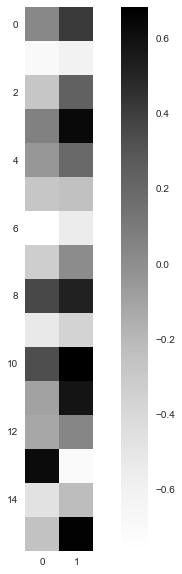

Which kernel has two weights with the biggest difference？What kind of time series trend will activate this kernel？
**Hint:** think about the edge detection for images.

**Your answer here along with an brief justification (for this part, a correct answer without an explanation will not receive full credit):** REPLACE THIS TEXT WITH YOUR ANSWER


**(d) [13 points across subparts]** Finally, we try using a recurrent neural net with the following layers:

1. An LSTM layer with **output size 12**
2. ReLU activation function
3. A Fully Connected layer with **2 output features** (please figure out the number of **input** feature(s) by yourself)
4. Softmax activation for classification

**Subpart i. [5 points]** Write code to construct a PyTorch model implementing the recurrent neural net stated above and report the summary table with the input `torch.zeros((200, 19, 1))`.

In [ ]:
torch.manual_seed(0) # DO NOT MODIFY
np.random.seed(0) # DO NOT MODIFY

# ---------------------------------------------------------------
# WRITE YOUR CODE HERE (CONSTRUCT RNN AND REPORT SUMMARY)
#
rnn = None  # this should be an nn.Sequential model

What does the number 19 mean for the example input above?

**Your answer here (for this subpart, we are explicitly grading just based on whether your answer is correct or not, so no explanation is needed; you either get full credit or no credit):** REPLACE THIS TEXT WITH YOUR ANSWER

**Subpart ii. [5 points]** Train the RNN using the Adam optimizer with a learning rate of 1e-2, a batch size of 20, and a total of 20 epochs. You don't need to tune the hyperparameters and don't worry about the accuracy of the model (if you find it to be unusually low or high--the point of this problem is **not** for you to be hyperparameter tuning to figure out how to get the RNN to get as high of an accuracy as possible; we just want to see that you can get the RNN to train). **To get training to work, you should only need to fill in the portion below on computing the proper training/validation sets (for simplicity, use the same fraction of data in the proper training set as when you trained the CNN--either use a new random split for what data are selected as proper training data vs validation data, or reuse the indices from when you trained the CNN for what is proper training vs validation). We've already put in code for you that does the model training using learning rate 1e-2, batch size 20, and number of epochs 20.**

In [ ]:
# ---------------------------------------------------------------
# WRITE YOUR CODE HERE (COMPUTE PROPER TRAINING/VALIDATION SETS)
#
proper_train_dataset = []
val_dataset = []
# ---------------------------------------------------------------


# ---------------------------------------------------------------
# DO NOT MODIFY THE CODE BELOW
#
train_accuracies, val_accuracies = \
    UDA_pytorch_classifier_fit(rnn,
                               torch.optim.Adam(rnn.parameters(),
                                                lr=1e-2),
                               nn.CrossEntropyLoss(),  # includes softmax
                               proper_train_dataset, val_dataset,20,20)
UDA_plot_train_val_accuracy_vs_epoch(train_accuracies, val_accuracies)

**Subpart iii. [3 points]** Report the test set raw accuracy for the RNN model you trained.

In [ ]:
# ---------------------------------------------------------------
# WRITE YOUR CODE HERE (TEST SET RAW ACCURACY)
#
rnn_predicted_test_labels = None  # to be filled out
# be sure to print the test set raw accuracy

**(e) [5 points]** Of the random forest, CNN, and RNN models that you trained, which has the highest **precision** on the test set?

**Your answer here along with code to justify your answer (for this part, a correct answer without code that justifies your answer will not receive full credit):** REPLACE THIS TEXT WITH YOUR ANSWER

In [ ]:
# ---------------------------------------------------------------
# WRITE YOUR CODE HERE THAT HELPS JUSTIFY YOUR ANSWER
#